# IMPORTS

In [17]:
from hvac_control.data import load_data, save_img, save_data
from hvac_control.preprocessing import *
from hvac_control.decision_plots import *

#load preprocessed data
data_to_load = "gaia_data_1.csv"
df_index = load_data(data_to_load, header_names=None, index=True)
df_index = remove_specific_day(df_index, '2022-05-25')
dfs_day_working_hours = remove_non_working_hours(df_index, strating_hour='05:00', ending_hour='17:30')
df_day = dfs_day_working_hours[-1]

# AVG FILTERING

Using a symmetric window around each point (t-2, t-1, t, t+1, t+2).

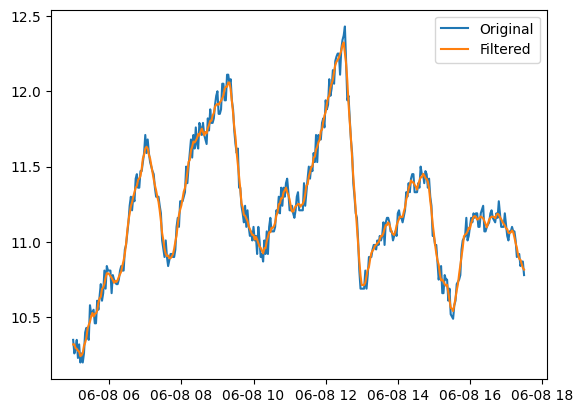

In [20]:
import matplotlib.pyplot as plt

columns = ['T_ret']
kernel_size = 5

df_filtered = df_day.copy()
for col in columns:
    signal = df_day[col]
    outside = kernel_size//2
    signal_pad = np.pad(signal, (outside, outside), 'edge')
    signal_conv = np.convolve(signal_pad, np.ones((kernel_size,))/kernel_size, mode='valid')
    df_filtered[col] = signal_conv

# Plotting (optional)
plt.plot(df_day['T_ret'], label='Original')
plt.plot(df_filtered['T_ret'], label='Filtered')
plt.legend()
plt.show()

To use only past data, we should use a window that includes the current and previous points (t, t-1, t-2, t-3, t-4).

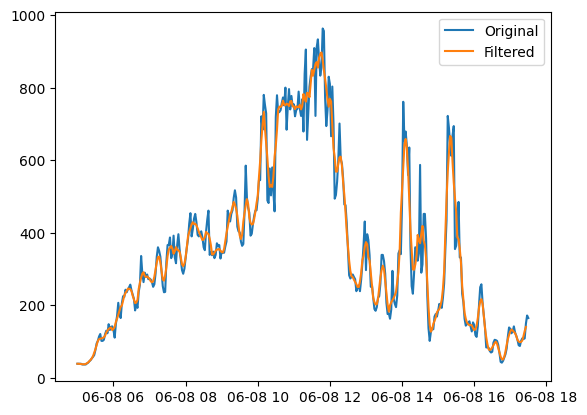

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
# df_day = pd.DataFrame({'T_ret': np.random.rand(100)})

columns = ['Solar_irrad']
kernel_size = 5
offset = kernel_size//2

df_filtered = df_day.copy()
for col in columns:
    signal = df_day[col]
    # Pad only the beginning of the signal
    signal_pad = np.pad(signal, (kernel_size - 1, 0), 'edge')
    # Create a custom kernel that considers only the current and past values
    kernel = np.ones(kernel_size)
    # Apply convolution using 'valid' mode, which ensures no future data is used
    signal_conv = np.convolve(signal_pad, kernel, mode='valid') / kernel_size
    # Assign the convoluted data back to the DataFrame
    df_filtered[col] = signal_conv

# Plotting (optional)
plt.plot(df_day['Solar_irrad'], label='Original')
plt.plot(df_filtered['Solar_irrad'].shift(-offset), label='Filtered')
plt.legend()
plt.show()

Delay visual example

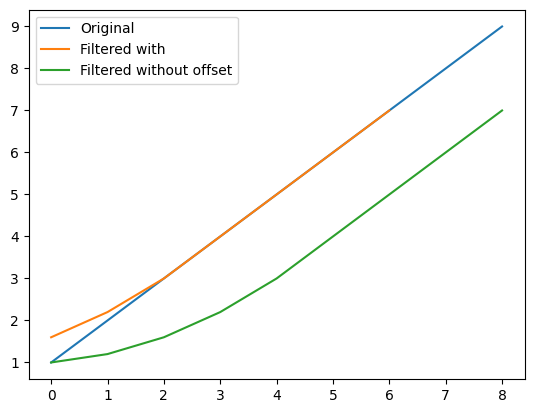

In [57]:
kernel_size = 5
offset = kernel_size//2

signal=np.arange(1,10)
# Pad only the beginning of the signal
signal_pad = np.pad(signal, (kernel_size - 1, 0), 'edge')
# Create a custom kernel that considers only the current and past values
kernel = np.ones(kernel_size)
# Apply convolution using 'valid' mode, which ensures no future data is used
signal_conv = np.convolve(signal_pad, kernel, mode='valid') / kernel_size


# Plotting (optional)
plt.plot(signal, label='Original')
plt.plot(signal_conv[offset:], label='Filtered with')
plt.plot(signal_conv[:], label='Filtered without offset')

plt.legend()
plt.show()